In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [394]:
df=pd.read_csv("heart.csv")

In [395]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#EDA

In [396]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [397]:
df.shape

(918, 12)

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [399]:
df.describe()  #only show numeric data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [400]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

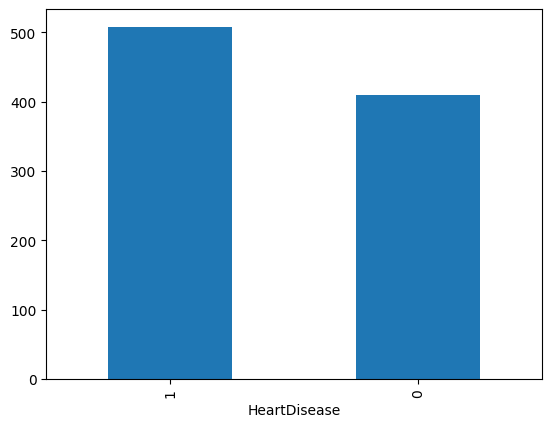

In [401]:
df["HeartDisease"].value_counts().plot(kind="bar")

In [402]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

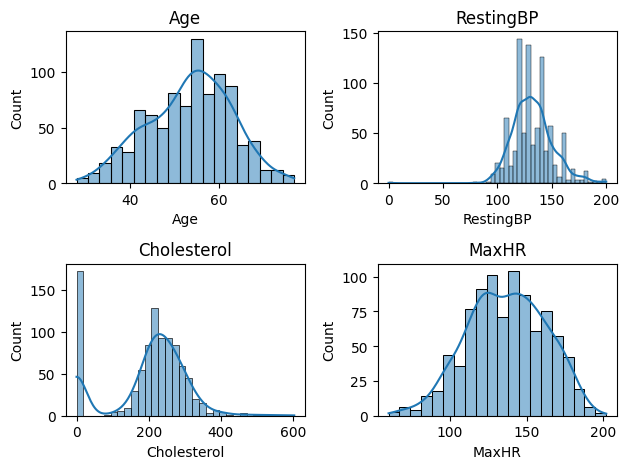

In [403]:
def plotting(var, num) -> None:
    plt.subplot(2, 2, num)
    sns.histplot(df[var], kde=True)
    plt.title(var)

#plt.figure(figsize=(10,8))

plotting("Age", 1)
plotting("RestingBP", 2)
plotting("Cholesterol", 3)
plotting("MaxHR", 4)

plt.tight_layout()
#plt.show()

In [404]:
Cholstr_mean=df.loc[df["Cholesterol"] != 0,"Cholesterol"].mean()
Cholstr_mean

np.float64(244.6353887399464)

In [405]:
df["Cholesterol"]=df["Cholesterol"].replace(0,Cholstr_mean)

In [406]:
df["Cholesterol"].value_counts
df["Cholesterol"]=df["Cholesterol"].round(2)  #round of 2 decimal place

In [407]:
df["Cholesterol"].value_counts()

Cholesterol
244.64    172
254.00     11
223.00     10
220.00     10
230.00      9
         ... 
392.00      1
316.00      1
153.00      1
466.00      1
131.00      1
Name: count, Length: 222, dtype: int64

In [408]:
restBP_mean=df.loc[df["RestingBP"] != 0,"RestingBP"].mean()
restBP_mean=restBP_mean.round(2)
restBP_mean

np.float64(132.54)

In [409]:
df["RestingBP"]=df["RestingBP"].replace(0,restBP_mean)
df["RestingBP"].value_counts()

RestingBP
120.0    132
130.0    118
140.0    107
110.0     58
150.0     55
        ... 
185.0      1
98.0       1
92.0       1
113.0      1
164.0      1
Name: count, Length: 67, dtype: int64

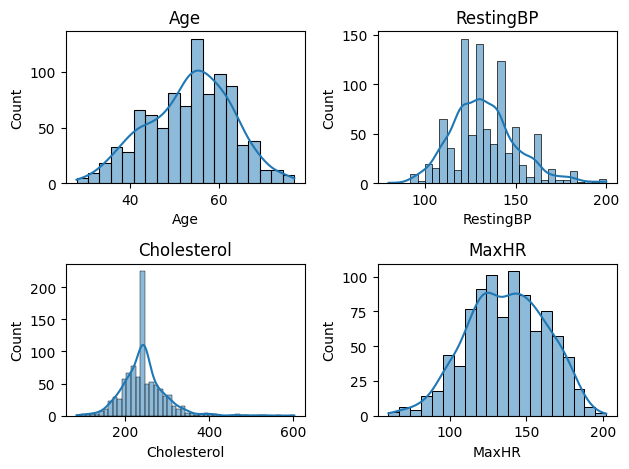

In [410]:
def plotting(var, num) -> None:
    plt.subplot(2, 2, num)
    sns.histplot(df[var], kde=True)
    plt.title(var)

#plt.figure(figsize=(10,8))

plotting("Age", 1)
plotting("RestingBP", 2)
plotting("Cholesterol", 3)
plotting("MaxHR", 4)

plt.tight_layout()
#plt.show()

<Axes: xlabel='Sex', ylabel='count'>

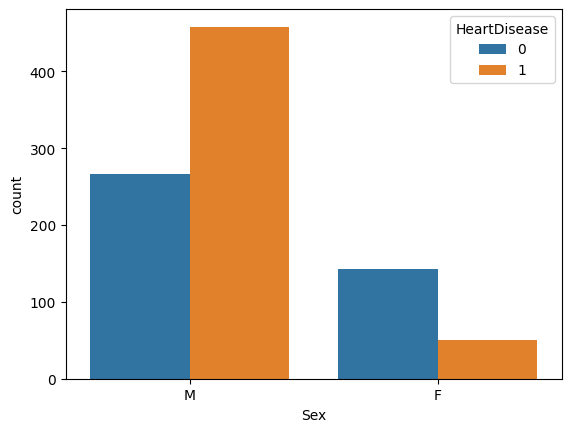

In [411]:
sns.countplot(x=df["Sex"],hue=df["HeartDisease"])

<Axes: xlabel='ChestPainType', ylabel='count'>

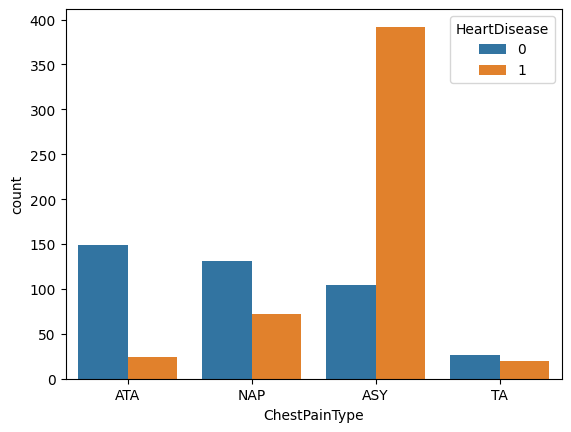

In [412]:
sns.countplot(x=df["ChestPainType"],hue=df["HeartDisease"])

<Axes: xlabel='FastingBS', ylabel='count'>

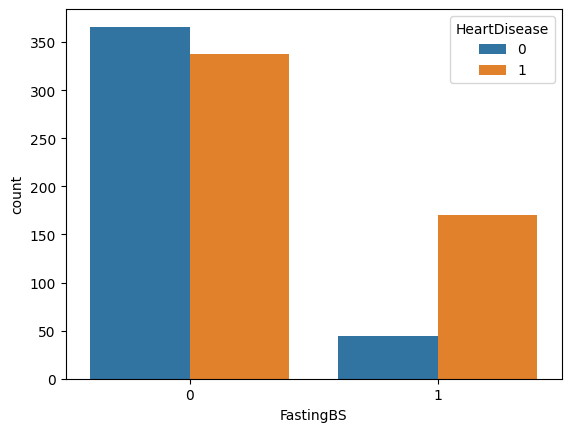

In [413]:
sns.countplot(x=df["FastingBS"],hue=df["HeartDisease"])

<Axes: xlabel='Cholesterol'>

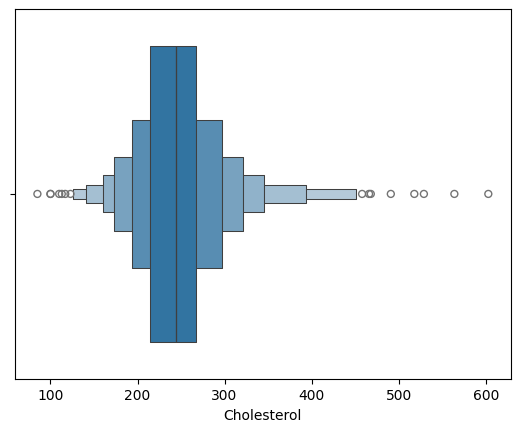

In [414]:
sns.boxenplot(x="Cholesterol",data=df)

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

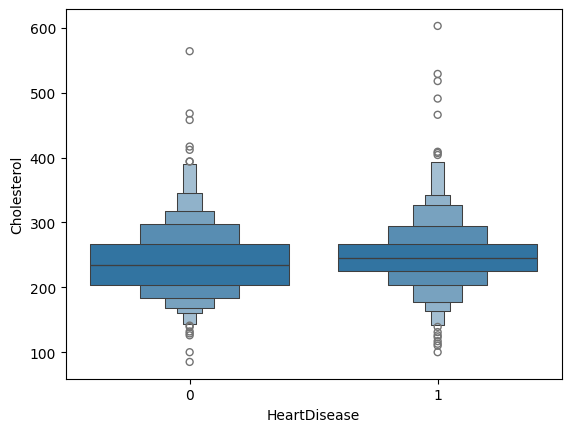

In [415]:
sns.boxenplot(x="HeartDisease", y="Cholesterol",data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

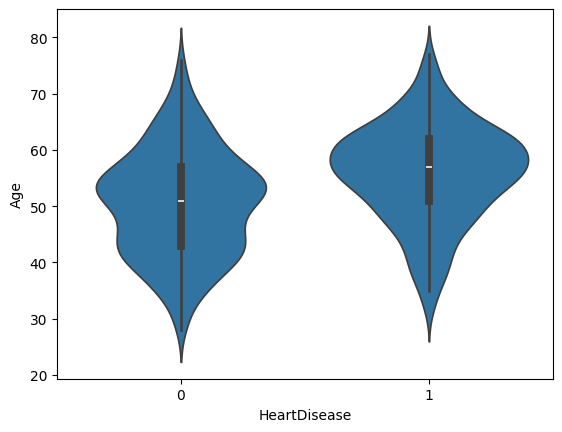

In [416]:
sns.violinplot(x="HeartDisease",y="Age",data=df)

<Axes: >

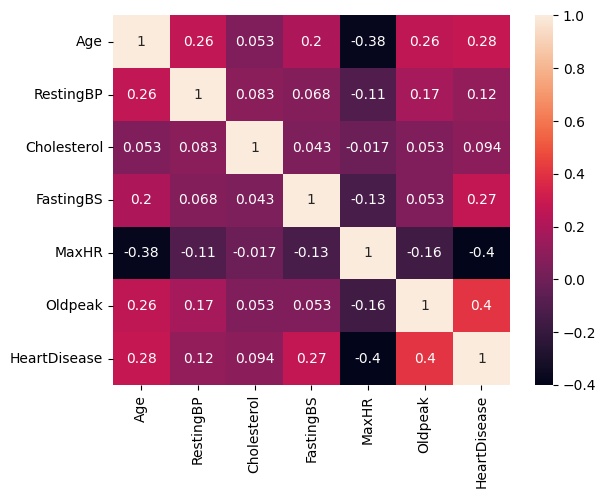

In [417]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

#Data preprocessind and cleaning

In [418]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [419]:
df_encode=pd.get_dummies(df,drop_first=True)

In [420]:
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [421]:
df_encode=df_encode.astype(int)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [422]:
from sklearn.preprocessing import StandardScaler

numerical_cols=["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]
scaler=StandardScaler()
df_encode[numerical_cols]=scaler.fit_transform(df_encode[numerical_cols])
df_encode
df_cleaned=df_encode



Feature Engineerinf and extracting Column(useful for model only column)

In [423]:
from scipy.stats import pearsonr

selected_feature=[
'Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_M',
'ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','RestingECG_Normal','RestingECG_ST',
'ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up'
]

correlations = {
    feature: 
    pearsonr(df_cleaned[feature],
        df_cleaned['HeartDisease'])[0]
    for feature in selected_feature
}

correlation_df=pd.DataFrame(
    list(correlations.items()),
    columns=['feature','pearson correlation']
    )
correlation_df.sort_values(by="pearson correlation",ascending=False)

,feature,pearson correlation
13,ST_Slope_Flat,0.554134
12,ExerciseAngina_Y,0.494282
5,Oldpeak,0.392385
6,Sex_M,0.305445
0,Age,0.282039
3,FastingBS,0.267291
1,RestingBP,0.117909
11,RestingECG_ST,0.102527
2,Cholesterol,0.092586
9,ChestPainType_TA,-0.054790


In [424]:
df_cleaned.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [425]:
from scipy.stats import chi2_contingency
import pandas as pd

category_features = [
"FastingBS",'Sex_M','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA',
'RestingECG_Normal','RestingECG_ST',
'ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up'
]

alpha = 0.05
chi2_results = {}

for col in category_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['HeartDisease'])
    
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    
    chi2_results[col] = {
        'Chi2_statistic': chi2_stat,
        'P_value': p_val,
        'Decision': decision
    }

# Move outside loop
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='P_value')

print(chi2_df)

                  Chi2_statistic   P_value                    Decision
ST_Slope_Up           352.823905       0.0  Reject Null (Keep Feature)
ST_Slope_Flat         279.659914       0.0  Reject Null (Keep Feature)
ExerciseAngina_Y      222.259383       0.0  Reject Null (Keep Feature)
ChestPainType_ATA     146.236323       0.0  Reject Null (Keep Feature)
Sex_M                  84.145101       0.0  Reject Null (Keep Feature)
FastingBS              64.320679       0.0  Reject Null (Keep Feature)
ChestPainType_NAP      40.608711       0.0  Reject Null (Keep Feature)
RestingECG_ST           9.135266  0.002507  Reject Null (Keep Feature)
RestingECG_Normal       7.327532  0.006791  Reject Null (Keep Feature)
ChestPainType_TA        2.273802  0.131577  Accept Null (Drop Feature)


In [426]:
final_df=df_cleaned[['Sex_M','Age','ChestPainType_ATA','ExerciseAngina_Y','ST_Slope_Up',"FastingBS",'MaxHR','ST_Slope_Flat','Oldpeak']] #if use logistic regrestion than remove one column st_slop_flat or st_slop_up

In [427]:
final_df

,Sex_M,Age,ChestPainType_ATA,ExerciseAngina_Y,ST_Slope_Up,FastingBS,MaxHR,ST_Slope_Flat,Oldpeak
0,1,-1.433140,1,0,1,0,1.382928,0,-0.727592
1,0,-0.478484,0,0,0,0,0.754157,1,0.282891
2,1,-1.751359,1,0,1,0,-1.525138,0,-0.727592
3,0,-0.584556,0,1,0,0,-1.132156,1,0.282891
4,1,0.051881,0,0,1,0,-0.581981,0,-0.727592
...,...,...,...,...,...,...,...,...,...
913,1,-0.902775,0,0,0,0,-0.188999,1,0.282891
914,1,1.536902,0,0,0,1,0.164684,1,2.303858
915,1,0.370100,0,1,0,0,-0.857069,1,0.282891
916,0,0.370100,1,0,0,0,1.461525,1,-0.727592


In [428]:
#Instead of manually selecting. This automatically selects important features.
"""from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

selector = SelectFromModel(model, threshold='median')
X_selected = selector.transform(X)"""

"from sklearn.feature_selection import SelectFromModel\nfrom sklearn.ensemble import RandomForestClassifier\n\nmodel = RandomForestClassifier()\nmodel.fit(X, y)\n\nselector = SelectFromModel(model, threshold='median')\nX_selected = selector.transform(X)"

In [429]:

X = final_df
y = df['HeartDisease']


In [437]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ["Age","MaxHR","Oldpeak"]

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [431]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y           #test_size means how many data set is testing my model.
)

In [438]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,      #More trees → more stable model But more computation time.
    max_depth=None,         #can goes very depth when max_depth=None in tree for solving question.
    class_weight='balanced',     #	70% No Disease and 30% Disease Model may become biased toward majority class. class_weight='balanced' means:👉 Give more importance to minority class
    random_state=42
)

model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [439]:
y_pred = model.predict(X_test) #x_test: This is the unseen test data (20% data).Model has NEVER seen this before.

In [440]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

roc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
import numpy as np
print("ROC AUC:", roc_score)

#Recall means : 👉 Model correctly detects 75% of sick patients 👉 But misses 25% of sick patients out  100 patients actually have heart disease.
#formula:Recall = 75/75+25 = 75/100 = 0.75 = 75\%

[[63 19]
 [17 85]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        82
           1       0.82      0.83      0.83       102

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184

ROC AUC: 0.8900645624103299


In [441]:
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test)) #max_depth=5 than test accuracy increase because then tree checvk depth upto 5.or other input can take.
#when train accuracy and test accuracy very large diifference i.e 19% this is not good becasuse our test accuracy not give perfect predicate.

Train Accuracy: 1.0
Test Accuracy: 0.8043478260869565


#API 

In [442]:
import joblib

joblib.dump(model, "heart_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']